In [25]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as pl 
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

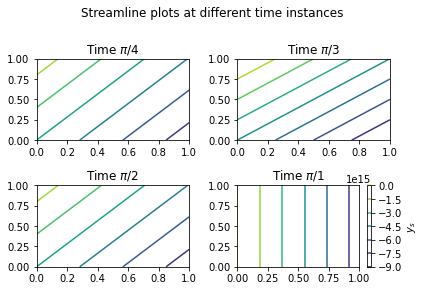

In [26]:
def y_s(xx,yy,t0):
    y_s  = yy - (1.0/np.sin(t0))*xx
    return y_s

xx,yy = np.meshgrid(np.linspace(0,1.0,25), np.meshgrid(np.linspace(0,1.0,25)))

t0 = np.linspace(np.pi/4.0,np.pi,4)
for i in range(4):
    fig = pl.subplot(2,2,i+1)
    pl.contour(xx,yy,y_s(xx,yy,t0[i]))
    pl.title(r"Time $\pi/$"+str(4-i))
    pl.tight_layout()    
pl.colorbar(label="$y_s$")    
pl.suptitle("Streamline plots at different time instances", y=1.0)
pl.tight_layout()

In [27]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
Y, X = np.meshgrid(x, y)
u = -1 - X**2 + Y
v = 1 + X - Y**2

# Create streamline figure
fig = ff.create_streamline(x, y, u, v, arrow_scale=.1)
fig.show()

In [28]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)
source_strength = 5.0
x_source, y_source = -1.0, 0.0

# Compute the velocity field on the mesh grid
u = (source_strength/(2*np.pi) *
     (X - x_source)/((X - x_source)**2 + (Y - y_source)**2))
v = (source_strength/(2*np.pi) *
     (Y - y_source)/((X - x_source)**2 + (Y - y_source)**2))

# Create streamline figure
fig = ff.create_streamline(x, y, u, v,
                           name='streamline')

# Add source point
fig.add_trace(go.Scatter(x=[x_source], y=[y_source],
                          mode='markers',
                          marker_size=14,
                          name='source point'))

fig.show()

Text(0.5, 1.0, 'Pathlines for the given velocity field from random points at t=0')

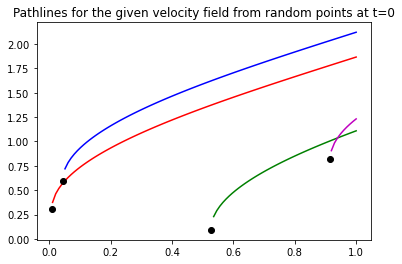

In [29]:
def path(x, x_p, y_p):
    y = y_p + np.arccos(-x +x_p+1)
    return y

x = np.linspace(0,1.0,100)
#at t = 0, the initial positions are generated at random
x_0 = np.random.rand(4)
y_0 = np.random.rand(4)
pl.plot(x, path(x,x_0[0],y_0[0]),'r-')
pl.plot(x_0,y_0,'ko')
pl.plot(x, path(x,x_0[1],y_0[1]),'b-')
pl.plot(x, path(x,x_0[2],y_0[2]),'g-')
pl.plot(x, path(x,x_0[3],y_0[3]),'m-')
pl.title("Pathlines for the given velocity field from random points at t=0")

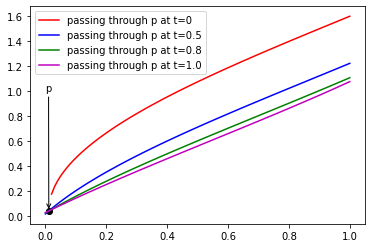

In [30]:
def path_diffT(x, x_p, y_p,t):
    y = y_p + np.arccos(np.cos(t)-x +x_p) -t
    return y


x = np.linspace(0,1.0,100)
#at t = 0, the initial positions are generated at random
x_0 = 0.01106655
y_0 = 0.03922218
pl.plot(x, path(x,x_0,y_0),'r-',label="passing through p at t=0")
pl.plot(x_0,y_0,'ko')
pl.plot(x, path_diffT(x,x_0,y_0,0.5),'b-', label="passing through p at t=0.5")
pl.plot(x, path_diffT(x,x_0,y_0,0.8),'g-',label="passing through p at t=0.8")
pl.plot(x, path_diffT(x,x_0,y_0,1.0),'m-',label="passing through p at t=1.0")
pl.annotate('p', xy =(x_0, y_0),
                xytext =(0., 1.0), 
                arrowprops = dict(facecolor ='green', arrowstyle = "->",),)
pl.legend()

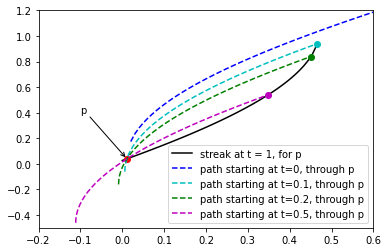

In [31]:
def path_until_t(x, x_p, y_p, t_s, t):
    x = x_p - np.cos(t) + np.cos(t_s)
    y = y_p + t - t_s
    return x,y

# pathline 
xp =  0.01106655
yp =  0.03922218
x = np.linspace(0,1.0,100)
y2 = yp -  np.arccos(x + np.cos(1.0) - xp) + 1.0

#streakline
t = np.linspace(0, 1.0, 30)
#xxx,yyy = path_until_t(x, xp, yp, 0.1,t)

pl.plot(x,y2,'k', label="streak at t = 1, for p ")
pl.plot(xp, yp, 'ro')
pl.plot(x, path(x,xp,yp),'b--', label="path starting at t=0, through p")
pl.plot(path_until_t(x, xp, yp, 0.1,t)[0], path_until_t(x, xp, yp, 0.1,t)[1],'c--', label= "path starting at t=0.1, through p")
pl.plot(path_until_t(x, xp, yp, 0.1,t)[0][-1], path_until_t(x, xp, yp, 0.1,t)[1][-1],'co')
pl.plot(path_until_t(x, xp, yp, 0.2,t)[0], path_until_t(x, xp, yp, 0.2,t)[1],'g--', label= "path starting at t=0.2, through p")
pl.plot(path_until_t(x, xp, yp, 0.2,t)[0][-1], path_until_t(x, xp, yp, 0.2,t)[1][-1],'go')
pl.plot(path_until_t(x, xp, yp, 0.5,t)[0], path_until_t(x, xp, yp, 0.5,t)[1],'m--', label= "path starting at t=0.5, through p")
pl.plot(path_until_t(x, xp, yp, 0.5,t)[0][-1], path_until_t(x, xp, yp, 0.5,t)[1][-1],'mo')
pl.annotate('p', xy =(xp, yp),
                xytext =(-0.1, 0.4), 
                arrowprops = dict(facecolor ='green', arrowstyle = "->",),)
pl.xlim(-0.2,0.6)
pl.ylim(-0.5, 1.2)
pl.legend()

In [38]:
import sympy
from sympy.abc import x, y
def cylinder_stream_function(U=1, R=1):
    r = sympy.sqrt(x**2 + y**2)
    theta = sympy.atan2(y, x)
    return U * (r - R**2 / r) * sympy.sin(theta)

In [39]:
def velocity_field(psi):
    u = sympy.lambdify((x, y), psi.diff(y), 'numpy')
    v = sympy.lambdify((x, y), -psi.diff(x), 'numpy')
    return u, v

In [40]:
import numpy as npy
def plot_streamlines(ax, u, v, xlim=(-1, 1), ylim=(-1, 1)):
    x0, x1 = xlim
    y0, y1 = ylim
    Y, X =  npy.ogrid[y0:y1:100j, x0:x1:100j]
    ax.streamplot(X, Y, u(X, Y), v(X, Y), color='cornflowerblue')

In [41]:
def format_axes(ax):
    ax.set_aspect('equal')
    ax.figure.subplots_adjust(bottom=0, top=1, left=0, right=1)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    for spine in ax.spines.itervalues():
        spine.set_visible(False)

AttributeError: 'Spines' object does not contain a 'itervalues' spine

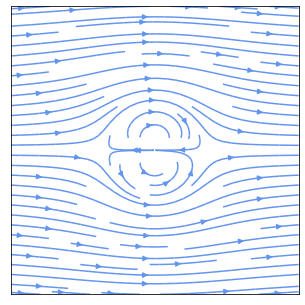

In [42]:
import matplotlib.pyplot as plt
psi = cylinder_stream_function()
u, v = velocity_field(psi)

xlim = ylim = (-3, 3)
fig, ax = plt.subplots(figsize=(4, 4))
plot_streamlines(ax, u, v, xlim, ylim)

c = plt.Circle((0, 0), radius=1, facecolor='none')
ax.add_patch(c)

format_axes(ax)